## CV SIFT Method for Image classification

#### Importing necessary libraries

In [31]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, hinge_loss
from matplotlib import pyplot as plt

#### Importing the dataset

In [2]:
from keras.datasets import cifar10
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

#### Observe Dataset

In [3]:
# Define the class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
train_labels_reshaped = train_labels.reshape(-1, )

In [4]:
def showImage(x, y, index):
    plt.figure(figsize=(30,4))
    plt.imshow(x[index])
    plt.xlabel(class_labels[y[index]])

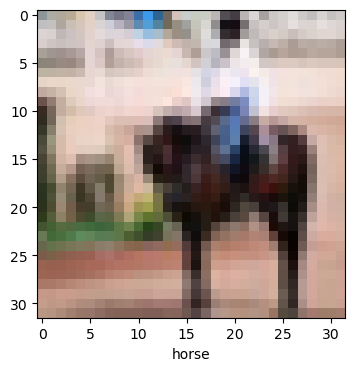

In [5]:
showImage(train_data, train_labels_reshaped, 11)

#### Define the number of clusters for K-Means

In [6]:
num_clusters = 128

#### Initialize the SIFT detector and descriptor

In [7]:
sift = cv2.SIFT_create()

#### Function to extract SIFT features from an image

In [8]:
def extract_sift_features(image):
    kp, des = sift.detectAndCompute(image, None)
    return des

#### Function to build the visual vocabulary

In [9]:
def build_visual_vocabulary(data):
    all_descriptors = []
    for image in data:
        descriptors = extract_sift_features(image)
        if descriptors is not None:
            all_descriptors.extend(descriptors)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(np.array(all_descriptors))
    return kmeans

#### Function to compute the bag-of-visual-words representation

In [10]:
def compute_bovw(image, vocab):
    descriptors = extract_sift_features(image)
    if descriptors is None:
        return np.zeros(num_clusters)
    codes = vocab.predict(descriptors)
    histogram, _ = np.histogram(codes, bins=range(num_clusters + 1), density=True)
    return histogram

#### Build the visual vocabulary

In [11]:
vocab = build_visual_vocabulary(train_data)

#### Compute the bag-of-visual-words representations for training and test data

In [12]:
train_bovw = np.array([compute_bovw(image, vocab) for image in train_data])
test_bovw = np.array([compute_bovw(image, vocab) for image in test_data])

#### Split the training data into train and validation sets

In [13]:
X_train, X_val, y_train, y_val = train_test_split(train_bovw, train_labels, test_size=0.2, random_state=42)

#### Train the SVM classifier

In [14]:
clf = SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train, y_train)

/Users/abhishekbagde/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=42)

#### Evaluate the classifier on the validation set

In [15]:
y_pred = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred)
print(f"Validation accuracy: {val_accuracy:.4f}")

Validation accuracy: 0.2603


#### Evaluate the classifier on the test set

In [16]:
y_pred = clf.predict(test_bovw)
test_accuracy = accuracy_score(test_labels, y_pred)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.2642


#### Find the loss

In [32]:
# Calculate the validation loss
val_loss = hinge_loss(y_val, clf.decision_function(X_val))
print(f"Validation loss: {val_loss:.4f}")

Validation loss: 3.6402


#### Check the result

Predicted Result: deer
Actual Result:


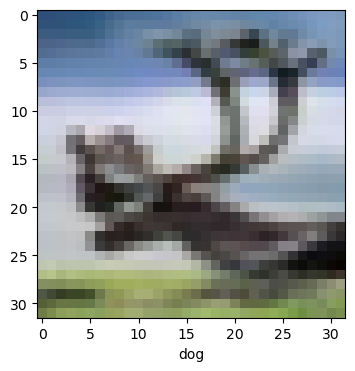

In [17]:
# Insert the image number
image_idx = 40

test_labels_reshaped = test_labels.reshape(-1, )
# Get the predicted result
predicted_class = y_pred[image_idx]
print(f"Predicted Result: {class_labels[predicted_class]}")

# Display the actual image
print("Actual Result:")
showImage(test_data, train_labels_reshaped, image_idx)

#### Evaluate Model

In [26]:
print("test_data shape:", test_data.shape)
print("test_labels shape:", test_labels_reshaped.shape)

test_data shape: (10000, 32, 32, 3)
test_labels shape: (10000,)


In [28]:
from keras.utils import to_categorical
y_test_one_hot = to_categorical(test_labels_reshaped, num_classes=10)

In [34]:
from sklearn.metrics import classification_report

In [35]:
# Get the classification report for the test set
report = classification_report(test_labels, y_pred, target_names=class_labels)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    airplane       0.37      0.37      0.37      1000
  automobile       0.29      0.30      0.29      1000
        bird       0.23      0.12      0.16      1000
         cat       0.20      0.13      0.16      1000
        deer       0.17      0.18      0.17      1000
         dog       0.24      0.33      0.28      1000
        frog       0.24      0.26      0.25      1000
       horse       0.27      0.28      0.28      1000
        ship       0.34      0.33      0.34      1000
       truck       0.27      0.34      0.30      1000

    accuracy                           0.26     10000
   macro avg       0.26      0.26      0.26     10000
weighted avg       0.26      0.26      0.26     10000



In [37]:
# Get the confusion matrix for the test set
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred)
#print("Confusion Matrix:\n", cm)
cm

array([[369,  64,  64,  28,  73,  47,  51,  90, 143,  71],
       [ 57, 298,  33,  40,  59,  95, 118,  55,  91, 154],
       [161,  77, 125,  59, 118, 108, 109, 103,  73,  67],
       [ 41,  60,  47, 129, 124, 203, 119, 103,  55, 119],
       [ 57,  93,  69,  54, 176, 137, 130, 128,  59,  97],
       [ 40,  61,  47,  94, 116, 325,  96,  77,  45,  99],
       [ 43,  96,  61,  67, 122, 139, 263,  68,  38, 103],
       [ 69,  63,  39,  59, 117, 100,  89, 282,  60, 122],
       [132,  93,  48,  49,  62,  76,  60,  44, 330, 106],
       [ 30, 131,  20,  57,  88,  98,  78,  81,  72, 345]])

In [38]:
import seaborn as sns

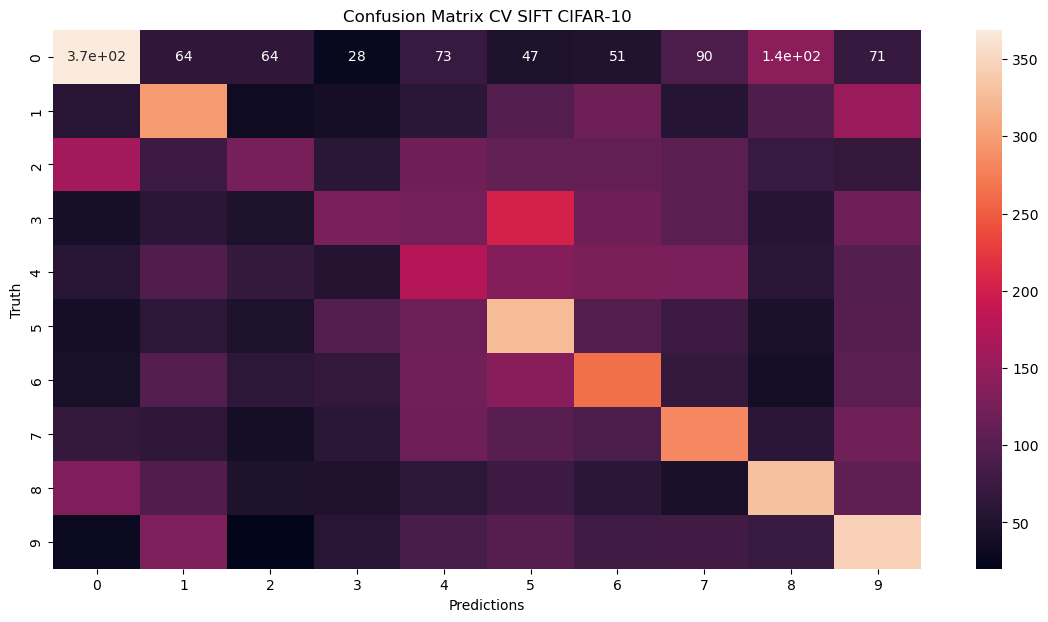

In [40]:
plt.figure(figsize=(14,7))
sns.heatmap(cm, annot=True, cbar=True)  # Adjust the colormap as needed
plt.ylabel("Truth")
plt.xlabel("Predictions")
plt.title("Confusion Matrix CV SIFT CIFAR-10")
plt.show()
